In [3]:
import numpy as np
import matplotlib.pyplot as plt


*Teorema*: A aproximação ótima de posto $r$ de uma matriz $A \in \mathbb{R}$, no sentido de _minimos quadrados_ é dada pelo truncamento da decomposição SVD:

$$
\argmin_{\tilde{X},\ \text{s.a: rank}(\tilde{X})=r} \|X - \tilde{X}\|_{F} = \tilde{U}\tilde{\Sigma}\tilde{V}^*
$$

onde $\tilde{U}$ e $\tilde{V}$ representam as primeiras $r$ colunas de $U$ e $V$ e $\tilde{\Sigma}$ representa o bloco $r \times r$ da matriz $\Sigma$

uint8 (256, 256)
float64


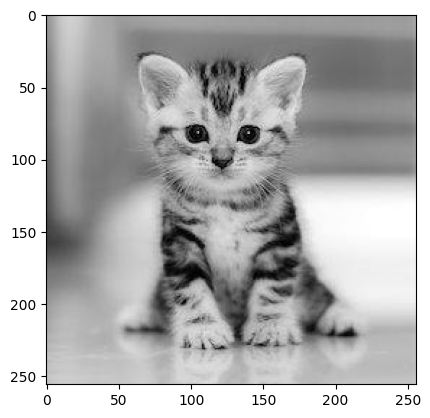

In [4]:
img = plt.imread('../PDI/kitten.jpg')
print(img.dtype, img.shape)
img = np.float64(img)
print(img.dtype)
plt.imshow(img, cmap='gray')

(256, 256)
(256,)
(256, 256)


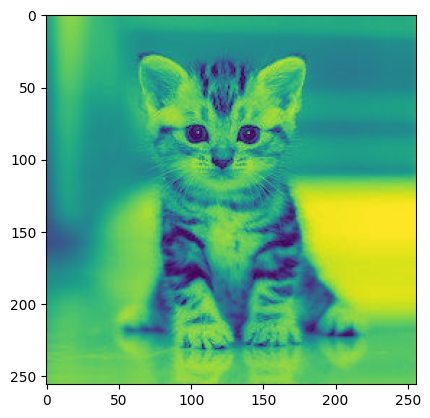

In [12]:
# APLICAR SVD
U, S, Vt = np.linalg.svd(img, full_matrices=True) #fll matrices nao ignora os elementos desnecessarios

print(U.shape)
print(S.shape)
print(Vt.shape)

A_reconstruct = U @ np.diag(S) @ Vt

plt.imshow(A_reconstruct)

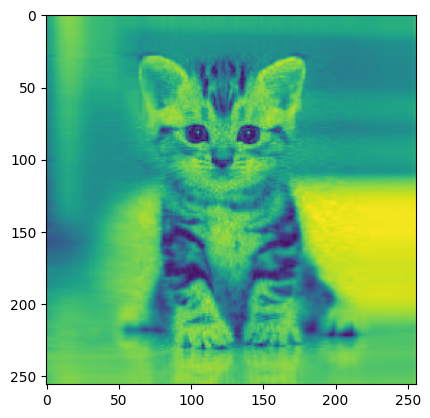

In [18]:
## SELECIONAR O POSTO DA MATRIX E COMPARAR COM O ORIGINAL
r = 35

Ur = U[:, :r] #todas as linhas e as primeiras r colunas
Sr = S[:r]
Vtr = Vt[:r, :]

Ar = Ur @ np.diag(Sr) @ Vtr

plt.imshow(Ar)

In [17]:
T_original = 256 * 256
T_reconstr = 256 * r + r + 256 * r

print(T_original)
print(T_reconstr)

65536
15390


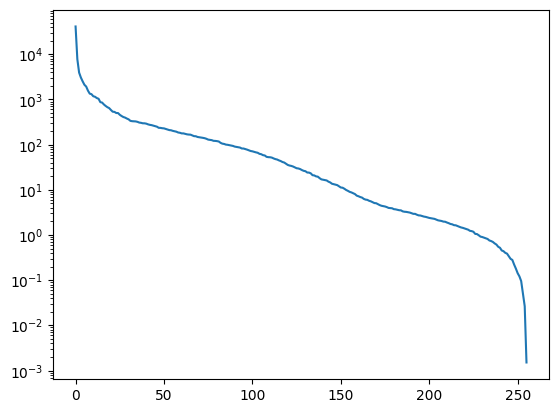

In [19]:
## MOSTRAR VALORES SINGULARES

plt.plot(S)
plt.yscale("log")

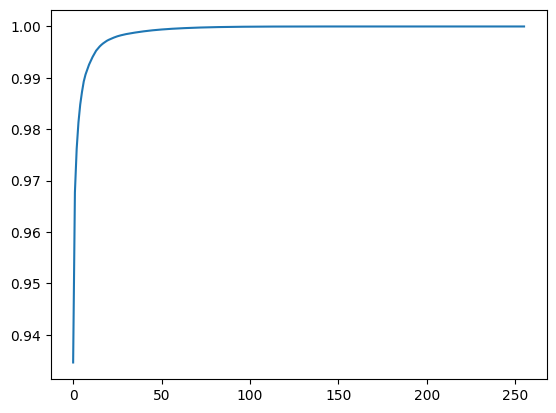

In [20]:
## ACUMULO DE ENERGIA (quadrado dos valores singulares)
S2 = S ** 2

energia = np.cumsum(S2) / S2.sum() #soma cumulativa sobre a soma

plt.plot(energia)


## Quantificação do erro

$$
\|X - \tilde{X}\|^2_F = \sum_{i=r+1}^{n} \sigma_i^2
$$

sigma sao os valores singulares que nao foram utilizados na reducao

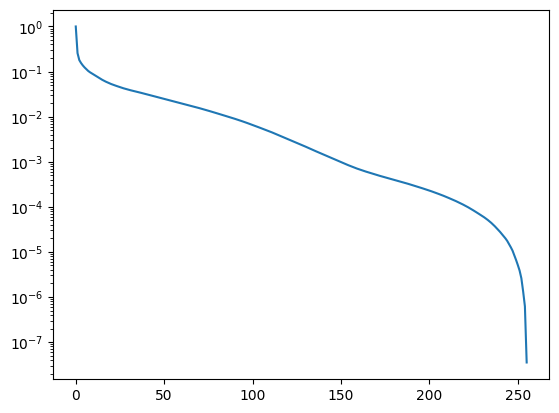

In [24]:
# ERRO DA APROXIMAÇÃO
erro = np.cumsum(S2[::-1])[::-1] #pega todos os elemento pela ordem inversa, depois inverte novamente
erro = np.sqrt(erro) #erro absoluto
erro_relativo = erro / np.linalg.norm(img)
plt.plot(erro_relativo)
plt.yscale("log")


In [28]:
# ERRO ATRAVÉS DOS VALORES SINGULARES
erro_real = np.linalg.norm(img - Ar)

print("Erro Real: ", erro_real)
print("Erro: ", erro[r])

Erro Real:  1503.9520216249164
Erro:  1503.952021624916


## Exercício: Implementação Básica do SVD 

**Objetivo:** Familiarizar-se com a função `np.linalg.svd()` e verificar as propriedades básicas da decomposição.

**Enunciado:**
Crie uma função `analisar_svd(matriz)` que:
1. Receba uma matriz A como entrada
2. Calcule a decomposição SVD: A = U × Σ × V^T
3. Imprima as dimensões de U, Σ e V^T
4. Verifique se a reconstrução A_reconstruída = U @ np.diag(s) @ Vt é igual à matriz original (use `np.allclose()`)
5. Retorne o número de valores singulares não-nulos (posto da matriz)

**Teste sua função com:**
- Uma matriz 4×3 aleatória
- Uma matriz identidade 5×5
- Uma matriz 50×50 de posto 2 (crie multiplicando duas matrizes de dimensões apropriadas)

In [ ]:
def analisar_svd(A):
    U, S, Vt = np.linalg.svd(A)
    
    print(U.shape)
    print(S.shape)
    print(Vt.shape)

    Sigma = np.zeros((A.shape[0], A.shape[1]))
    k = len(S)
    Sigma[:k, :k] = np.diag(S)
    A_reconstruida = U @ Sigma @ Vt

    if np.allclose(A, A_reconstruida):
        print("A Reconstruida = A")

    S_nao_nulos = np.count_nonzero(S)

    return S_nao_nulos